# Window Aggregation Experiments

<h2>Setting up</h2>

In [1517]:
#PAIRS COMPARISON

#throughput fig x 10^6..
#legend in second fig.
#better colors


import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from math import sqrt
SPINE_COLOR = 'gray'

<h3>Experiment 1</h3>

In [1518]:
DF = pd.read_csv('../setups/exp1-flat.csv',delimiter=';', index_col=[0])
DF

,AGG-PAIRS-L-MERGE,AGG-PAIRS-E-MERGE,AGG-B2B-L-MERGE,AGG-B2B-E-MERGE,AGG-GEN-L-MERGE,AGG-GEN-E-MERGE,AGG-PAIRS-L-UPDATE,AGG-PAIRS-E-UPDATE,AGG-B2B-L-UPDATE,AGG-B2B-E-UPDATE,AGG-GEN-L-UPDATE,AGG-GEN-E-UPDATE,RED-PAIRS-L,RED-PAIRS-E,RED-B2B-L,RED-B2B-E,RED-GEN-L,RED-GEN-E,MAXB-PAIR-L,MAXB-PAIR-E,MAXB-B2B-L,MAXB-B2B-E,MAXB-GEN-L,MAXB-GEN-E,AVGB-PAIR-L,...,AVGB-B2B-E,AVGB-GEN-L,AVGB-GEN-E,PARTIALS-PAIR-L,PARTIALS-PAIR-E,PARTIALS-B2B-L,PARTIALS-B2B-E,PARTIALS-GEN-L,PARTIALS-GEN-E,AVGCPU-PAIR-L,AVGCPU-PAIR-E,AVGCPU-B2B-L,AVGCPU-B2B-E,AVGCPU-GEN-L,AVGCPU-GEN-E,TOTALCPU-PAIR-L,TOTALCPU-PAIR-E,TOTALCPU-B2B-L,TOTALCPU-B2B-E,TOTALCPU-GEN-L,TOTALCPU-GEN-E,MAXB-NO,AVGB-NO,RED-NO,WINDOWS
#QUERIES,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,9252,4626,6626,3626,62446374,62435,32381251,32399756,32385878,32385878,0,858082771,32390503,32404382,32390504,32390504,62446374,858145206,4,7,4,7,16384,32767,4.0,...,5.0,2977.454545,5953.909091,9255,9255,4628,4628,32390506,32390506,224,220,217,217,633,4367,7281250000,7156250000,7031250000,7046875000,20515625000,"1,41E+11",1024,290,62446374,4626
10,2914337,470730,1855827,41788,1512769315,1252443,32325724,32762850,32349169,32611235,0,922680786,35240061,33233580,34204996,33075957,1512769315,923933229,64,127,32,63,32768,65535,24.8,...,29.0,5460.000000,10919.000000,64782,64782,41337,41337,32390506,32390506,419,395,348,357,5998,5417,13593750000,12796875000,11281250000,11578125000,"1,94E+11","1,75E+11",10240,2900,624463740,102737
20,4376711,1001422,2987872,575069,2272125935,1918268,32325724,32762850,32346225,32622505,0,922680786,36702435,33464272,35334097,33337574,2272125935,924599054,64,127,32,63,32768,65535,24.8,...,29.0,5460.000000,10919.000000,64782,64782,44281,44281,32390506,32390506,631,622,497,497,8858,5778,20468750000,20171875000,16125000000,16125000000,"2,87E+11","1,87E+11",20480,5800,1248927480,155633
30,7838911,1221885,6244012,1104581,4091467892,3425990,32325724,32791663,32338151,32738416,0,922652786,40164635,34013548,38582163,33842997,4091467892,926078776,64,127,64,127,32768,65535,24.8,...,48.6,5460.000000,10919.000000,64782,64782,52355,52355,32390506,32390506,995,907,677,631,13364,5749,32234375000,29390625000,21953125000,20468750000,"4,33E+11","1,86E+11",30720,8700,1873391220,274100
40,10188061,1593907,8122743,1451464,5315777522,4457785,32325724,32789298,32338151,32737249,0,922652786,42513785,34383205,40460894,34188713,5315777522,927110571,64,127,64,127,32768,65535,24.8,...,48.6,5460.000000,10919.000000,64782,64782,52355,52355,32390506,32390506,1321,1308,768,759,18819,6448,42812500000,42390625000,24906250000,24609375000,"6,10E+11","2,09E+11",40960,11600,2497854960,356970
50,13759550,2206177,10967908,1979633,7164212201,6065550,32325724,32797976,32338151,32745810,0,922652786,46085274,35004153,43306059,34725443,7164212201,928718336,64,127,64,127,32768,65535,24.8,...,48.6,5460.000000,10919.000000,64782,64782,52355,52355,32390506,32390506,1737,1745,1018,949,23795,6400,56281250000,56531250000,33000000000,30765625000,"7,71E+11","2,07E+11",51200,14500,3122318700,483139
60,17668152,2747071,14097820,2433059,9158204293,7641777,32325724,32851410,32338151,32801815,0,922652786,49993876,35598481,46435971,35234874,9158204293,930294563,64,127,64,127,32768,65535,24.8,...,48.6,5460.000000,10919.000000,64782,64782,52355,52355,32390506,32390506,2211,2238,1137,1098,28357,6467,71625000000,72500000000,36859375000,35593750000,"9,19E+11","2,09E+11",61440,17400,3746782440,598687
70,20039002,3134994,16192379,2796879,10378611926,8654381,32325724,32855724,32337495,32808500,0,922652786,52364726,35990718,48529874,35605379,10378611926,931307167,64,127,64,127,32768,65535,24.8,...,48.6,5460.000000,10919.000000,64782,64782,53011,53011,32390506,32390506,2742,2830,1340,1285,36732,7275,88843750000,91687500000,43406250000,41625000000,"1,19E+12","2,36E+11",71680,20300,4371246180,680458
80,21876884,3412697,17684328,3056064,11333899061,9432559,32325724,32855724,32337495,32808500,0,922652786,54202608,36268421,50021823,35864564,113338

In [1519]:
# Style parameters
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 50)
pd.options.display.mpl_style = 'default'
new_style = {'grid': True}
mpl.rc('axes', **new_style)

# cool colors
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

#font = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 10}

#mpl.rc('font', **font)

#Direct input 
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 10,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 
fig = plt.figure()

#You must select the correct size of the plot in advance
#fig.set_size_inches(3.54,3.54) 

def legendaryFormat(leg, resize=True):
    # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('white')

    # Set the fontsize
    if(resize):
        for label in legend.get_texts():
            label.set_fontsize('large')
        for label in legend.get_lines():
            label.set_linewidth(2)  # the legend line width
        
        
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 10,
              'text.fontsize': 9, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'font.family' : 'helvetica',
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    mpl.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax

In [1520]:
%matplotlib inline

In [1521]:
#run for latex-optimised generation
#plt.style.use('ggplot')
latexify()

<h2>Part I</h2> 
<h3>No_aggregation vs aggregation</h3>

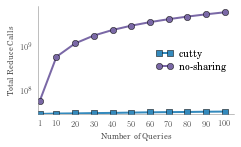

In [1332]:
#Comparing Number of Aggregates

ax =DF[['RED-B2B-E','RED-NO']].plot(logy = True, style=['s-','o-'],linewidth=2, xticks=[1,10,20,30,40,50,60,70,80,90,100])
ax.set_xlim(0,105)
ax.set_ylim(0,8544637400)
ax.set_xlabel("Number of Queries")
ax.set_ylabel("Total Reduce Calls")
ax.set_axis_bgcolor('white')

lines,labels = ax.get_legend_handles_labels()
legend = ax.legend(lines, ['cutty','no-sharing'], loc=5)

legendaryFormat(legend)
format_axes(ax)
plt.tight_layout()
fig = ax.get_figure()
#fig.savefig('exp1redshare.pdf' )

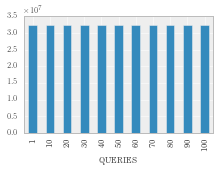

In [1342]:
DF['AGG-B2B-L-UPDATE'].plot(kind='bar')

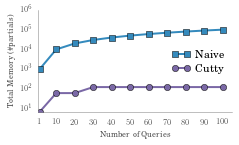

In [1422]:
#Comparing Allocated (Memory) Resources
#Aggregates are not enough of an argument since multi-query execution can be potentially parallelized
#The real impact can be seen in the amount of resources allocated- notice that this is logarithmic scale!

#DF[['AVGB-NO','AVGB-B2B-L']].plot(kind='bar', logy = True)
#Comparing Number of Aggregates
ax =DF[['MAXB-NO','MAXB-B2B-E']].plot(logy=True, style=['s-','o-'],linewidth=2, legend=False, xticks=[1,10,20,30,40,50,60,70,80,90,100])
ax.set_xlim(0,105)
ax.set_ylim(0,1000000)
ax.set_xlabel("Number of Queries")
ax.set_ylabel("Total Memory (\#partials)")
ax.set_axis_bgcolor('white')

lines,labels = ax.get_legend_handles_labels()
legend = ax.legend(lines, ['Naive','Cutty'], loc=5)
legendaryFormat(legend)

format_axes(ax)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('exp1memshare.pdf', dpi=1000, bbox_inches='tight' )

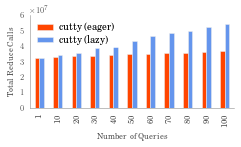

In [1337]:
ax = DF[['RED-B2B-E', 'RED-B2B-L']].plot(kind='bar',color=["orangered","cornflowerblue"], legend=True)
#ax.set_ylim(0,60000000)
ax.set_xlabel("Number of Queries")
ax.set_ylabel("Total Reduce Calls")
ax.set_axis_bgcolor('white')

#lines,labels = ax.get_legend_handles_labels()
#legend = ax.legend(lines, ['b2b','no-sharing'], loc=2,  shadow=True)
#legendaryFormat(legend)

lines,labels = ax.get_legend_handles_labels()
legend = ax.legend(lines, ['cutty (eager)','cutty (lazy)'], loc=2)
legendaryFormat(legend)

format_axes(ax)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('exp1evsl.pdf', dpi=1000, bbox_inches='tight' )

<h3>Time & number of Aggregation Calls</h3>

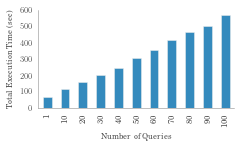

In [811]:
#DF['TOTALCPU-B2B-E'].plot()
exectime = DF[['TOTALCPU-B2B-E']]/100000000
#exectime.columns = ['b2b']
ax = exectime.plot(kind='bar', legend = False)
ax.set_xlabel("Number of Queries")
ax.set_ylabel("#Total Execution Time (sec)")
ax.set_axis_bgcolor('white')

format_axes(ax)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('exp1time.pdf')

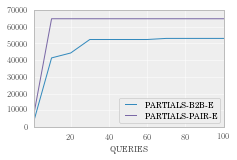

In [1444]:
#DF['TOTALCPU-B2B-E'].plot()
DF[['PARTIALS-B2B-E', 'PARTIALS-PAIR-E']].plot()


KeyError: 'SUM-B2B-RED'

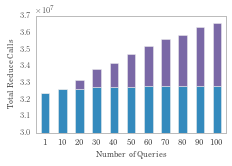

In [1431]:
merges = DF[['AGG-B2B-E-UPDATE', 'AGG-B2B-E-MERGE']]
ax = merges.plot(kind='bar',stacked=True, rot=1, legend=False)
ax.set_xlabel("Number of Queries")
ax.set_ylabel("Total Reduce Calls")
ax.set_ylim(30000000,37000000)
plt.xticks(rotation=0)
ax2 = ax
ax.set_axis_bgcolor('white')
DF['SUM-B2B-RED'] = DF[['AGG-B2B-E-UPDATE']] + DF[['AGG-B2B-E-MERGE']]
reduces = DF['SUM-B2B-RED']
#reduces.columns = ['total-agg']
ax2.plot(ax.get_xticks(),reduces,linestyle='-', marker='o',linewidth=2)

#ax3 = DF[['RED-B2B-E']].plot(linestyle='-', marker='o', legend=True)
ax2.set_ylim(ax.get_ylim())
#legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
legend = ax2.legend(lines + lines2, ['pre-agg','final-agg','total-agg'], loc=2)
legendaryFormat(legend,resize=False)

format_axes(ax)
plt.tight_layout()
fig = ax2.get_figure()
fig.savefig('exp1reduces.pdf')


<h2>Part II</h2> 
<h3>Periodic Query Comparison - Pairs vs B2B</h3>

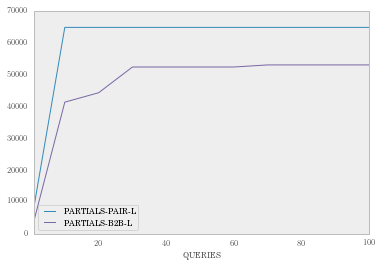

In [627]:
#Comparing Number of Generated Partials
DF[['PARTIALS-PAIR-L','PARTIALS-B2B-L']].plot()

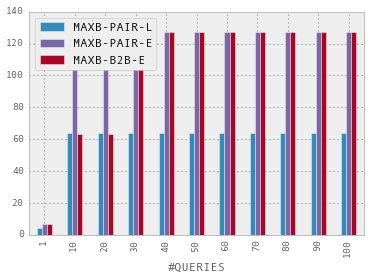

In [91]:
#Comparing Memory Requirements

#MAX MEMORY BUGGER ALLOCATED
DF[['MAXB-PAIR-L','MAXB-PAIR-E','MAXB-B2B-E']].plot(kind='bar')

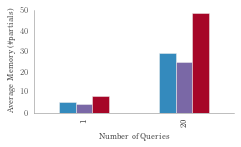

In [791]:
#MAX MEMORY BUFFERS ALLOCATED
#DF['AVGPARTIALS-PAIR'] = DF['PARTIALS-PAIR-L'] * DF.index / DF['WINDOWS']
#DF['AVGPARTIALS-B2B'] = DF['PARTIALS-B2B-L'] * DF.index / DF['WINDOWS']

ax = DF.loc[[1, 20], ['AVGB-B2B-E','AVGB-PAIR-L','AVGB-PAIR-E']].plot(kind='bar', legend=False)

ax.set_xlabel("Number of Queries")
ax.set_ylabel("Average Memory (#partials) ")
ax.set_axis_bgcolor('white')

lines,labels = ax.get_legend_handles_labels()
#legend = ax.legend(lines, ['b2b','pair-sharing','pair-sharing+'], loc=2)

#legendaryFormat(legend)
format_axes(ax)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('exp2mem.pdf' )


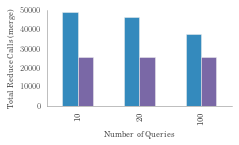

In [1536]:
#MAX MEMORY BUFFERS ALLOCATED
#DF['AVGPARTIALS-PAIR'] = DF['PARTIALS-PAIR-L'] * DF.index / DF['WINDOWS']
#DF['AVGPARTIALS-B2B'] = DF['PARTIALS-B2B-L'] * DF.index / DF['WINDOWS']

DF['AGG-B2B-L-STORE'] = DF['AGG-B2B-L-UPDATE']-32300000
DF['AGG-PAIRS-L-STORE'] = DF['AGG-PAIRS-L-UPDATE']-32300000
ax = DF.loc[[10,20,100], ['AGG-B2B-L-STORE','AGG-PAIRS-L-STORE']].plot(kind='bar',  legend=False)

ax.set_xlabel("Number of Queries")
ax.set_ylabel("Total Reduce Calls (merge)")
ax.set_axis_bgcolor('white')

lines,labels = ax.get_legend_handles_labels()
#legend = ax.legend(lines, ['b2b','pair-sharing','pair-sharing+'], loc=2)

#legendaryFormat(legend)
format_axes(ax)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('exp2calls.pdf' )


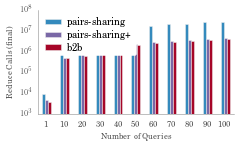

In [795]:
#Comparing Aggregation Calls

#ax = DF[['RED-PAIRS-L','RED-PAIRS-E','RED-B2B-E']].plot(kind='bar', logy=True)
ax = DF[['AGG-PAIRS-L-MERGE','AGG-PAIRS-E-MERGE','AGG-B2B-E-MERGE']].plot(kind='bar', logy=True, rot=1)
#ax.set_ylim(0,43000000)

#ax.set_xlim(0,105)
#ax.set_ylim(0,8544637400)
ax.set_xlabel("Number of Queries")
ax.set_ylabel("Reduce Calls (final)")
ax.set_axis_bgcolor('white')

lines,labels = ax.get_legend_handles_labels()
legend = ax.legend(lines, ['pairs-sharing','pairs-sharing+','b2b'], loc=2)

legendaryFormat(legend)
format_axes(ax)
plt.tight_layout()
fig = ax.get_figure()
#fig.savefig('exp1pair.pdf' )

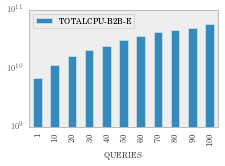

In [604]:
#Comparing Execution Time

#ax = DF[['RED-PAIRS-L','RED-PAIRS-E','RED-B2B-E']].plot(kind='bar', logy=True)
ax = DF[['TOTALCPU-PAIR-L','TOTALCPU-PAIR-E','TOTALCPU-B2B-E']].plot(kind='bar', logy=True)

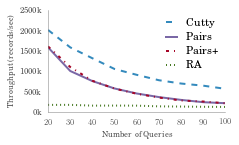

In [1415]:
#Comparing Throughput
#FIX LINES
DF['TP-PAIR-E'] = 1000000000/DF['AVGCPU-PAIR-E']
DF['TP-PAIR-L'] = 1000000000/DF['AVGCPU-PAIR-L']
DF['TP-B2B-E'] = 1000000000/DF['AVGCPU-B2B-E']
#DF['TP-GEN-L'] = 1000000000/DF['AVGCPU-GEN-L']
DF['TP-GEN-E'] = 1000000000/DF['AVGCPU-GEN-E']
#ax = DF[['AVGCPU-PAIR-L','AVGCPU-PAIR-E','AVGCPU-B2B-E']].plot(kind='bar')
#ax = DF[['TP-PAIR-L','TP-PAIR-E','TP-B2B-E','TP-GEN-L', 'TP-GEN-E']].plot(kind='bar')
ax = DF.loc[[20,30,40,50,60,70,80,90,100],['TP-B2B-E','TP-PAIR-L','TP-PAIR-E', 'TP-GEN-E']].plot(style=[ '--', '-', '-.', ':'], linewidth=2)

vals = ax.get_yticks()
ax.set_yticklabels(['{:4.0f}k'.format(x/1000) for x in vals])
ax.set_xlabel("Number of Queries")
ax.set_ylabel("Throughput (records/sec)")
ax.set_axis_bgcolor('white')

lines,labels = ax.get_legend_handles_labels()
legend = ax.legend(lines, ['Cutty','Pairs','Pairs+', 'RA'], loc=1)

legendaryFormat(legend)
format_axes(ax)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('exp2throughput.pdf' )


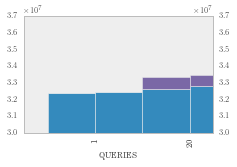

In [757]:
#ABANDONED
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim(30000000,37000000)
ax2 = ax.twinx()
ax2.set_ylim(30000000,37000000)

DF.loc[[1, 20], ['AGG-PAIRS-E-UPDATE','AGG-PAIRS-E-MERGE']].plot(kind='bar',  ax=ax, stacked=True, position=0, legend=False)
DF.loc[[1,20],['AGG-B2B-E-UPDATE','AGG-B2B-E-MERGE']].plot(kind='bar',  ax=ax2, stacked=True, position=1, legend=False)
ax.set_ylabel = ('change1')
ax2.set_ylabel = ('change2')
plt.show()


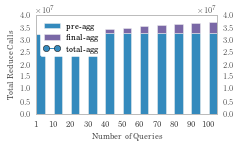

In [747]:

# TESTING STACKED FOR AGGREGATES AND UPDATES
#df_b2b_agg = DF[['AGG-B2B-E-MERGE','AGG-B2B-E-UPDATE']]
#df_b2b_agg.plot(kind='bar', stacked=True, logy=True, rot=1)

merges = DF[['AGG-PAIRS-E-UPDATE','AGG-PAIRS-E-MERGE']]
ax = merges.plot(kind='bar',stacked=True, rot=1, position=0, legend=False)
ax.set_xlabel("Number of Queries")
ax.set_ylabel("Total Reduce Calls")
#ax.set_ylim(30000000,37000000)
plt.xticks(rotation=0)
ax2 = ax.twinx()
ax.set_axis_bgcolor('white')


ax2.plot(kind='bar', data=DF[['AGG-B2B-E-MERGE','AGG-B2B-E-UPDATE']], position=1, stacked=True, rot=1, legend=False)
#ax3 = DF[['RED-B2B-E']].plot(linestyle='-', marker='o', legend=True)
ax2.set_ylim(ax.get_ylim())
#legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
legend = ax2.legend(lines + lines2, ['pre-agg','final-agg','total-agg'], loc=2)
legendaryFormat(legend,resize=False)

    
format_axes(ax)
plt.tight_layout()
fig = ax2.get_figure()
fig.savefig('exp1pairreduces.pdf')



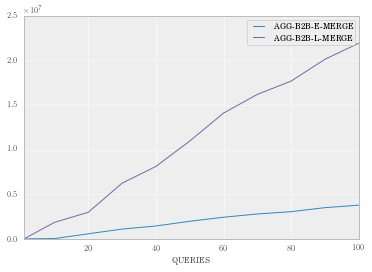

In [1290]:
df_b2b_agg = DF[['AGG-B2B-E-MERGE','AGG-B2B-L-MERGE','NO']].plot()
#FIXME - STACK MERGES AND UPDATES PER TECHNIQUE

<h2>Part III</h2> 
<h3>Comparing General vs B2B Shared Aggregation on periodic queries</h3>
Here we just generate similar experiments to compare general aggregation with flatfat and b2b aggregation. Comparing general aggregation vs b2b should be mainly shown for non-periodic queries (see next part). This part is just for us, to reason a bit about the results and get a complete picture.


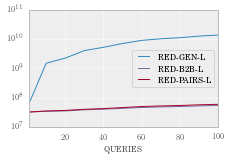

In [816]:
#Comparing Number of Generated Partials - LOGARITHMIC SCALE
DF[['RED-GEN-L','RED-B2B-L','RED-PAIRS-L']].plot( logy=True)

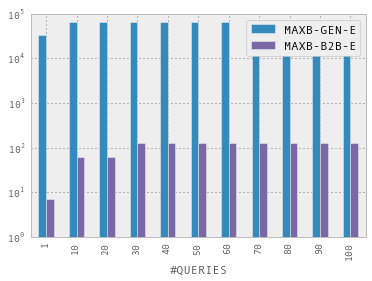

In [99]:
#MAX MEMORY BUGGER ALLOCATED
DF[['MAXB-GEN-E','MAXB-B2B-E']].plot(kind='bar', logy=True)

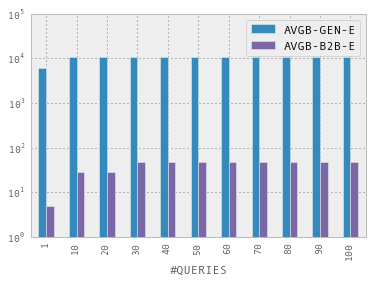

In [100]:
#NOT SO GOOD TO SHOW
#MAX MEMORY BUFFERS ALLOCATED
DF[['AVGB-GEN-E','AVGB-B2B-E']].plot(kind='bar', logy=True)

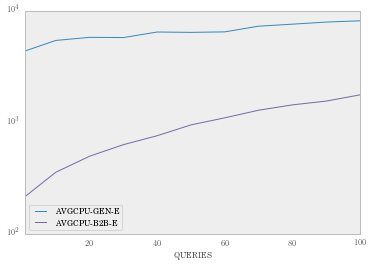

In [668]:
#Comparing Execution Time

#ax = DF[['RED-PAIRS-L','RED-PAIRS-E','RED-B2B-E']].plot(kind='bar', logy=True)
ax = DF[['AVGCPU-GEN-E','AVGCPU-B2B-E']].plot( logy=True)
#ax.set_ylim(38545954000, 91545954000)

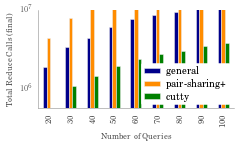

In [1360]:
ax = DF.loc[[20,30,40,50,60,70,80,90,100],['AGG-GEN-E-MERGE','AGG-PAIRS-L-MERGE','AGG-B2B-E-MERGE']].plot(kind='bar', color=["DarkBlue", "DarkOrange", "Green"], logy=True)
ax.set_xlabel("Number of Queries")
ax.set_ylabel("Total Reduce Calls (final)")
ax.set_axis_bgcolor('white')
ax.set_ylim(0,10000000)

lines,labels = ax.get_legend_handles_labels()
legend = ax.legend(lines, ['general','pair-sharing+','cutty'],  loc=4)

legendaryFormat(legend)
format_axes(ax)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('exp2allred.pdf' )

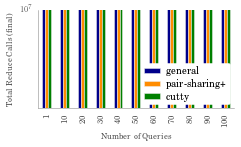

In [1262]:
ax = DF[['RED-GEN-E','RED-PAIRS-E','RED-B2B-E']].plot(kind='bar', color=["DarkBlue", "DarkOrange", "Green"], logy=True)
ax.set_xlabel("Number of Queries")
ax.set_ylabel("Total Reduce Calls (final)")
ax.set_axis_bgcolor('white')
ax.set_ylim(0,10000000)

lines,labels = ax.get_legend_handles_labels()
legend = ax.legend(lines, ['general','pair-sharing+','cutty'],  loc=4)

legendaryFormat(legend)
format_axes(ax)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('exp2allred.pdf' )

<h3>Experiment 2</h3>

In [1224]:
DF2 = pd.read_csv('../setups/exp2-flat.csv',delimiter=';', index_col=[0])
DF2

,AGG-B2B-E-MERGE,AGG-GEN-E-MERGE,AGG-B2B-E-UPDATE,AGG-GEN-E-UPDATE,RED-B2B-E,RED-GEN-E,MAXB-B2B-E,MAXB-GEN-E,AVGB-B2B-E,AVGB-GEN-E,PARTIALS-B2B-E,PARTIALS-GEN-E,AVGCPU-B2B-E,AVGCPU-GEN-E,TOTALCPU-B2B-E,TOTALCPU-GEN-E
#QUERIES,,,,,,,,,,,,,,,,
1,0,10063,32388316,425442982,32388316,425453045,7,16777215,5.000000,2100803.363636,2190,32390506,219,4083,7109375000,"1,32E+11"
20,166803,285185,32742326,426625684,32909129,426910869,255,16777215,163.579310,2915775.561404,52167,32390506,332,4266,10765625000,"1,38E+11"
40,1651452,2079787,34643069,426625684,36294521,428705471,1023,16777215,700.806452,2915775.561404,268349,32390506,697,4514,22578125000,"1,46E+11"


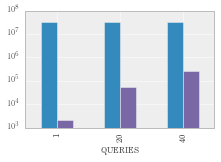

In [1241]:
#Comparing Number of Generated Partials - LOGARITHMIC SCALE
DF2[['PARTIALS-GEN-E','PARTIALS-B2B-E']].plot(kind='bar', logy=True, legend= False)

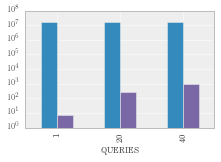

In [1239]:
#MAX MEMORY BUGGER ALLOCATED
DF2[['MAXB-GEN-E','MAXB-B2B-E']].plot(kind='bar', logy=True, legend=False)

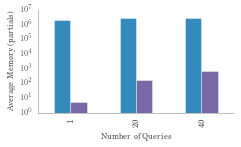

In [1252]:
#MAX MEMORY BUFFERS ALLOCATED
ax = DF2[['AVGB-GEN-E','AVGB-B2B-E']].plot(kind='bar', logy=True, legend=False)

ax.set_xlabel("Number of Queries")
ax.set_ylabel("Average Memory (#partials) ")
ax.set_axis_bgcolor('white')

#lines,labels = ax.get_legend_handles_labels()
#legend = ax.legend(lines, ['general','b2b'],  loc=1)
#legendaryFormat(legend)

format_axes(ax)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('exp3mem.pdf' )

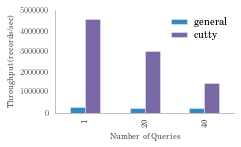

In [1260]:
#THROUGHPUT
DF2['TP-GEN-E'] = 1000000000/DF2['AVGCPU-GEN-E']
DF2['TP-B2B-E'] = 1000000000/DF2['AVGCPU-B2B-E']
ax = DF2.loc[[1, 20, 40],['TP-GEN-E','TP-B2B-E']].plot(kind='bar')
#FIXME - STACK MERGES AND UPDATES PER TECHNIQUE

ax.set_xlabel("Number of Queries")
ax.set_ylabel("Throughput (records/sec)")
ax.set_axis_bgcolor('white')
#ax.set_ylim(0,10000000)

lines,labels = ax.get_legend_handles_labels()
legend = ax.legend(lines, ['general','cutty'],  loc=1)

legendaryFormat(legend)
format_axes(ax)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('exp3tp.pdf' )

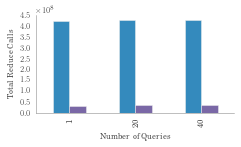

In [1250]:
#TOTAL REDUCES
ax = DF2.loc[[1, 20, 40],['RED-GEN-E','RED-B2B-E']].plot(kind='bar', legend=False)
ax.set_xlabel("Number of Queries")
ax.set_ylabel("Total Reduce Calls")
ax.set_axis_bgcolor('white')
#ax.set_ylim(0,10000000)

#lines,labels = ax.get_legend_handles_labels()
#legend = ax.legend(lines, ['general','b2b'],  loc=1)

#legendaryFormat(legend)
format_axes(ax)
plt.tight_layout()
fig = ax.get_figure()
fig.savefig('exp3red.pdf' )

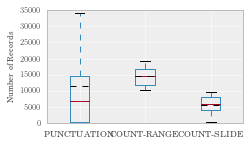

In [1477]:
pwindows = pd.read_csv('../setups/puncwindows.csv',delimiter=';', index_col=[0]).reset_index()
perwindows = pd.read_csv('../setups/perwindows.csv',delimiter=',', index_col=[0]).reset_index()
merged = pd.merge(perwindows, pwindows, how = 'outer', left_index = True, right_index=True)

merged.rename(columns={'RANGE':'COUNT-RANGE','SLIDE':'COUNT-SLIDE','SIZES':'PUNCTUATION'}, inplace=True)
ax = merged[['PUNCTUATION','COUNT-RANGE','COUNT-SLIDE']].boxplot(meanline=True, showmeans=True, showcaps=True, 
                                               showbox=True, showfliers=False)

plt.tight_layout()
plt.ylabel('Number of Records')
plt.savefig('exp3distr.pdf', bbox_inches='tight')

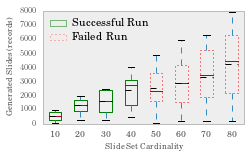

In [1599]:
import matplotlib.patches as mpatches

p10 = pd.read_csv('p10',delimiter=';', index_col=[0]).reset_index()
p20 = pd.read_csv('p20',delimiter=';', index_col=[0]).reset_index()
p30 = pd.read_csv('p30',delimiter=';', index_col=[0]).reset_index()
p40 = pd.read_csv('p40',delimiter=';', index_col=[0]).reset_index()
p50 = pd.read_csv('p50',delimiter=';', index_col=[0]).reset_index()
p60 = pd.read_csv('p60',delimiter=';', index_col=[0]).reset_index()
p70 = pd.read_csv('p70',delimiter=';', index_col=[0]).reset_index()
p80 = pd.read_csv('p80',delimiter=';', index_col=[0]).reset_index()
p90 = pd.read_csv('p90',delimiter=';', index_col=[0]).reset_index()
p100 = pd.read_csv('p100',delimiter=';', index_col=[0]).reset_index()

merged = pd.merge(p10,p20, how='outer', left_index = True, right_index=True)
merged = pd.merge(merged,p30, how='outer', left_index = True, right_index=True)
merged = pd.merge(merged,p40, how='outer', left_index = True, right_index=True)
merged = pd.merge(merged,p50, how='outer', left_index = True, right_index=True)
merged = pd.merge(merged,p60, how='outer', left_index = True, right_index=True)
merged = pd.merge(merged,p70, how='outer', left_index = True, right_index=True)
merged = pd.merge(merged,p80, how='outer', left_index = True, right_index=True)
#merged = pd.merge(merged,p90, how='outer', left_index = True, right_index=True)
#merged = pd.merge(merged,p100, how='outer', left_index = True, right_index=True)
merged.rename(columns={'RANGE10':'10','RANGE20':'20','RANGE30':'30','RANGE40':'40','RANGE50':'50','RANGE60':'60','RANGE70':'70','RANGE80':'80'
                       #,'RANGE90':'','RANGE100':''
                      }, inplace=True)
ax = merged.boxplot(meanline=True, grid=False, showmeans=True, showcaps=True, showbox=True, showfliers=False)

#p = Rectangle((0, 0), 1, 1, fc="r")

green_patch = mpatches.Patch(color='green', fill=False, label='Successful Run')
red_patch = mpatches.Patch(color='red',fill=False, label='Failed Run', linestyle='dotted')

#red_patch = mpatches.Rectangle(grid[1] - [0.025, 0.05], 0.05, 0.1, ec="none")
legend = plt.legend(handles=[green_patch,red_patch], loc=2)

frame = legend.get_frame()
frame.set_edgecolor('none')
for label in legend.get_texts():
    label.set_fontsize('large')

plt.setp(ax['boxes'][:4], color='green')
plt.setp(ax['boxes'][4:], color='red',linestyle=':')
#plt.setp(ax['boxes'], linewidth=2)
plt.tight_layout()
plt.ylabel('Generated Slides (#records)')
plt.xlabel('Slide Set Cardinality')
plt.savefig('expbashpair.pdf', bbox_inches='tight')


In [1070]:
13841 + 1.5 * (13841-404)

33996.5

In [1205]:
#EXPLORATORY QUERIES
#pwindows[['SIZES']].describe(percentiles=[.05, .25, .75, .80])
#outliers = pd.read_csv('../setups/outliers.csv',delimiter=',', index_col=[0])
#outliers = outliers.reset_index()
#set(outliers[outliers.WINLENGTH > 3000000].WINID)